## Solucion al proyecto de freecodecamp para el
## curso de Data Analisys With Python 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('medical_examination.csv')
# setting overweight column
df['BIM'] = (df['weight'])/((df['height']/100)**2)
df['overweight'] = df['BIM'].apply(lambda x: 0 if x > 25 else 1 )
# Normalizing data
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1 )
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1 )
#df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1 )
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BIM,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,0


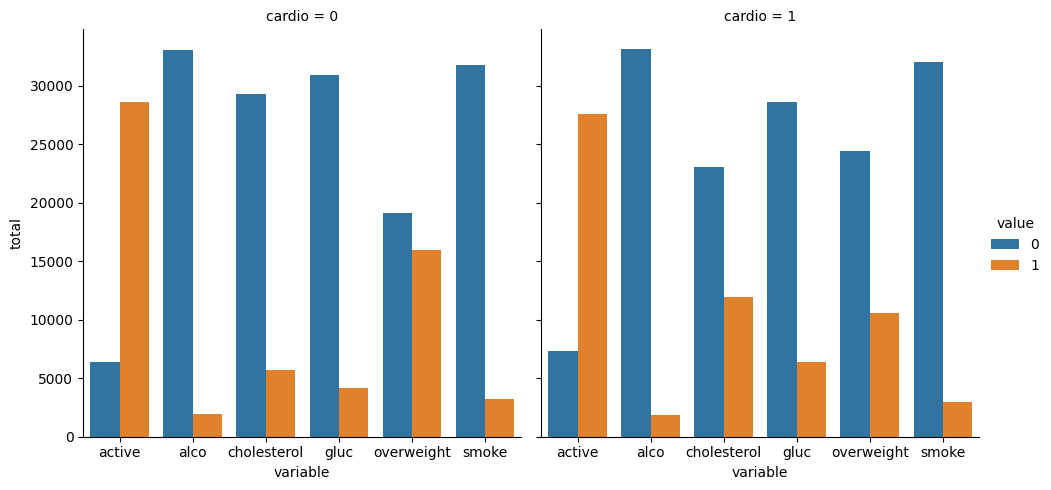

In [40]:
# traspone una columna con otras, convirtiendo columnas a filas
df_cat = pd.melt(df, id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# melt te crea dos columnas variable y value
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat = df_cat.rename(columns={0:'total'})
df_cat
graph = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")
fig = graph.fig

#Esta seccion si la corremos dos veces el group by se re ajusta y asi la data, por lo tanto el gracico.

In [45]:
df=df[df['ap_lo'] <= df['ap_hi']]
df = df[
(df['height'] >= df['height'].quantile(0.025)) &
(df['height'] <= df['height'].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025)) &
(df['weight'] <= df['weight'].quantile(0.975))
]

In [46]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BIM,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,1
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,0


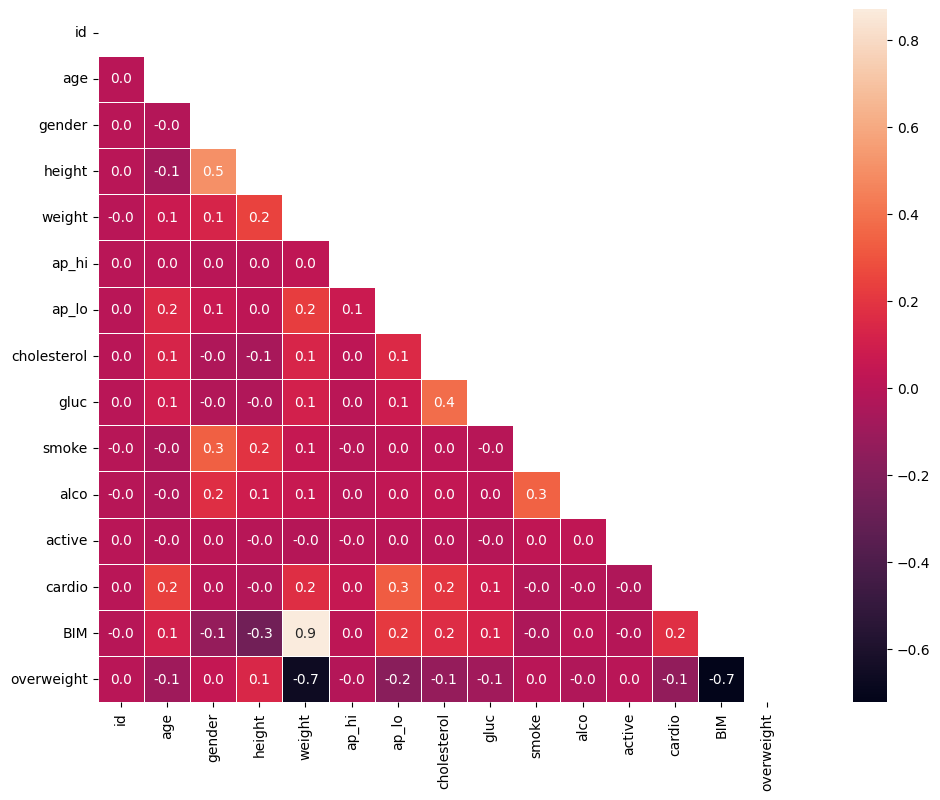

In [47]:
df_heat = df    
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

# Do not modify the next two lines
fig.savefig('heatmap.png')